In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import os
import keras
from keras import layers

In [2]:
train = os.path.join('../input/intel-image-classification/seg_train/seg_train')
test = os.path.join('../input/intel-image-classification/seg_test/seg_test')
pred = os.path.join('../input/intel-image-classification/seg_pred/seg_pred')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train,
                                                    target_size=(150, 150), 
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(test,
                                                              target_size=(150, 150), 
                                                              batch_size=1,
                                                              class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


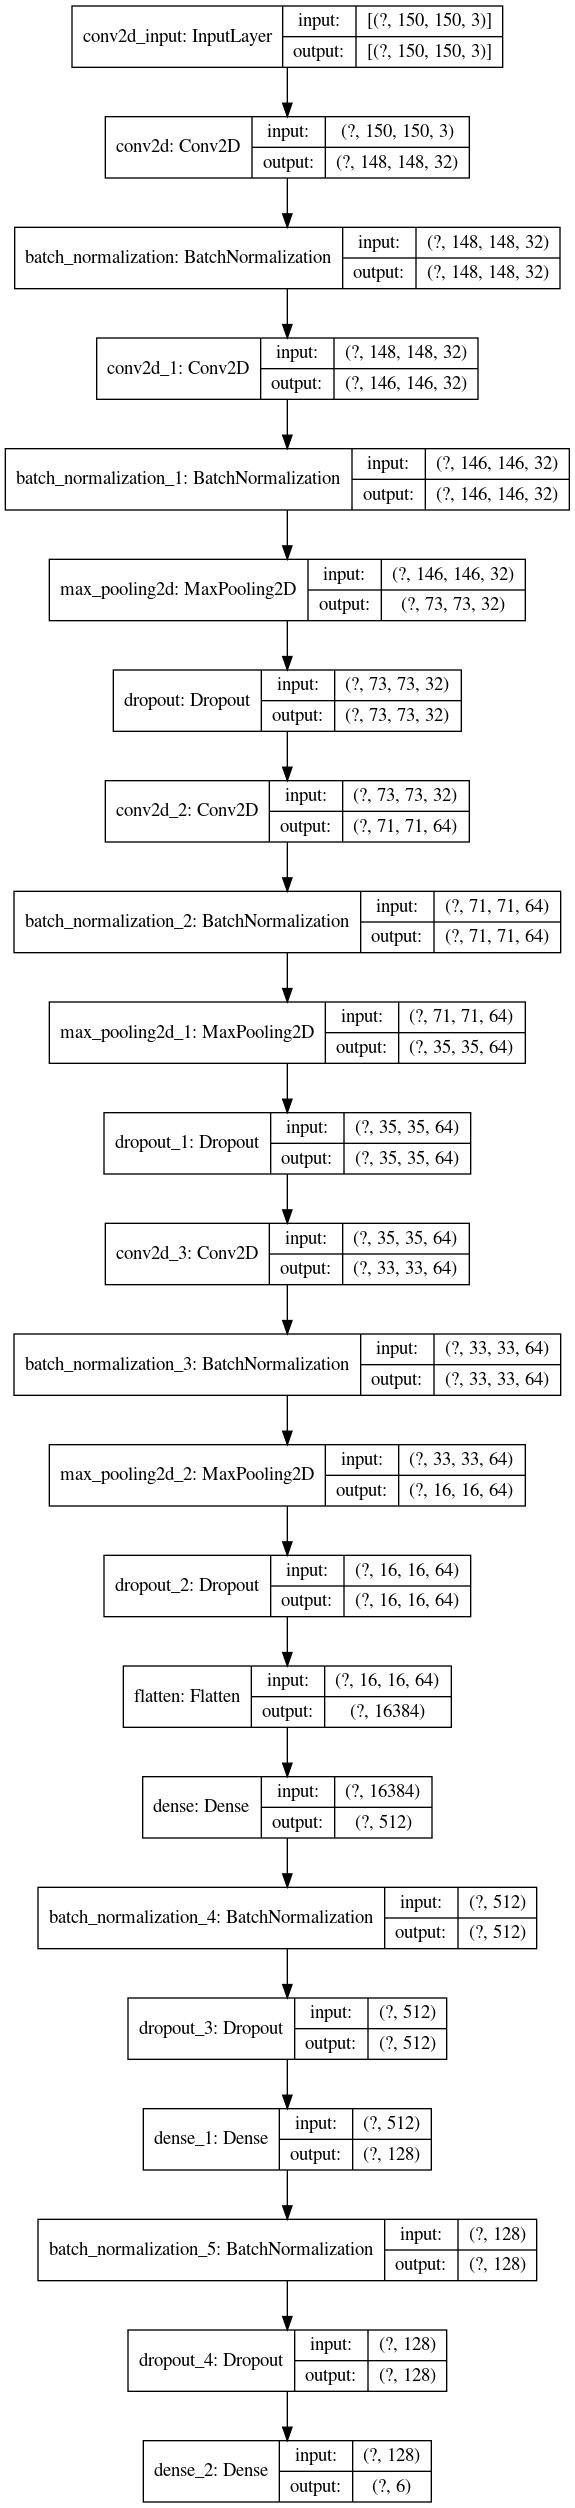

In [4]:
model = tf.keras.models.Sequential([
    
    # 1st CNN
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=(3,3),
                           activation='relu', 
                           input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    
    
    # 2nd CNN
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=(3,3),
                           activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    
    
    # 3.CNN
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=(3,3),
                           activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    
    
    # 4.CNN
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=(3,3),
                           activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    
    
    tf.keras.layers.Flatten(), 

    
    # 1.ANN
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    
    # 2.ANN
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    
    # OUTPUT
    tf.keras.layers.Dense(6, activation='softmax'),
])

#model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [5]:
from tensorflow.keras.optimizers import *

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [6]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data = validation_generator)

Epoch 1/100
439/439 [==============================] - 142s 324ms/step - loss: 1.4018 - accuracy: 0.5034 - val_loss: 2.2677 - val_accuracy: 0.3720
Epoch 2/100
439/439 [==============================] - 121s 275ms/step - loss: 1.0381 - accuracy: 0.6072 - val_loss: 1.2091 - val_accuracy: 0.5663
Epoch 3/100
439/439 [==============================] - 120s 274ms/step - loss: 0.9268 - accuracy: 0.6541 - val_loss: 1.2483 - val_accuracy: 0.6073
Epoch 4/100
439/439 [==============================] - 119s 271ms/step - loss: 0.8758 - accuracy: 0.6774 - val_loss: 0.8047 - val_accuracy: 0.7250
Epoch 5/100
439/439 [==============================] - 119s 272ms/step - loss: 0.7996 - accuracy: 0.7028 - val_loss: 0.8967 - val_accuracy: 0.6933
Epoch 6/100
439/439 [==============================] - 119s 270ms/step - loss: 0.7607 - accuracy: 0.7248 - val_loss: 0.9452 - val_accuracy: 0.6707
Epoch 7/100
439/439 [==============================] - 118s 269ms/step - loss: 0.7075 - accuracy: 0.7446 - val_loss: 1